In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sb
import seaborn as mp
import seaborn as cb
import pandas_ta


from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = web.DataReader('TSLA',data_source = 'yahoo', start='2020-01-01',end='2021-01-01') 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [4]:
df = df[['Adj Close']]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  253 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


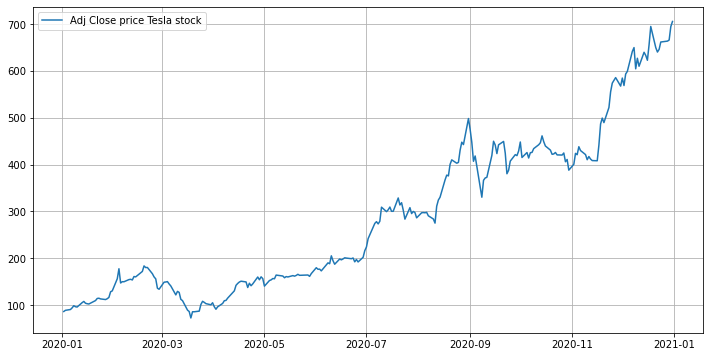

In [5]:
plt.gcf().set_size_inches(12, 6, forward=True)
High = plt.plot(df['Adj Close'])
plt.grid()
plt.legend(['Adj Close price Tesla stock']) # for testing

In [6]:
df.ta.ema(close='adj Close', length=10, append=True)
df.head(10)

,Adj Close,EMA_10
Date,,
2020-01-02,86.052002,NaN
2020-01-03,88.601997,NaN
2020-01-06,90.307999,NaN
2020-01-07,93.811996,NaN
2020-01-08,98.428001,NaN
2020-01-09,96.267998,NaN
2020-01-10,95.629997,NaN
2020-01-13,104.972000,NaN
2020-01-14,107.584000,NaN


In [7]:
df = df.iloc[9:]
df.head(10)

,Adj Close,EMA_10
Date,,
2020-01-15,103.699997,96.535599
2020-01-16,102.697998,97.656035
2020-01-17,102.099998,98.464028
2020-01-21,109.440002,100.459660
2020-01-22,113.912003,102.905540
2020-01-23,114.440002,105.002715
2020-01-24,112.963997,106.450221
2020-01-27,111.603996,107.387271
2020-01-28,113.379997,108.476858


C:\Users\User\AppData\Local\Temp/ipykernel_9496/1349322019.py:4: UserWarning: Legend does not support 'Adj Close price Tesla stock' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(['Adj Close price Tesla stock'],['EMA_10 graf'])


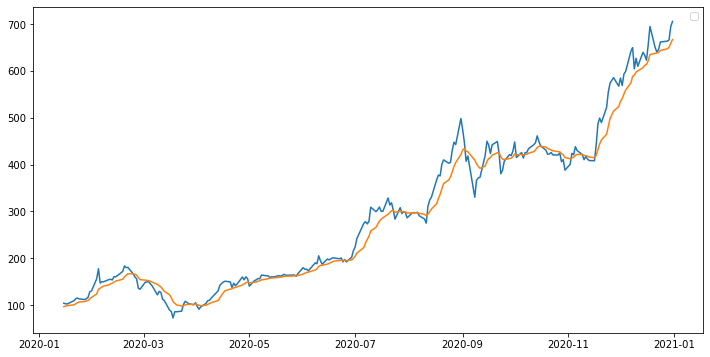

In [8]:
plt.gcf().set_size_inches(12, 6, forward=True)
High = plt.plot(df['Adj Close'])
EMA_10 = plt.plot(df['EMA_10'])
plt.legend(['Adj Close price Tesla stock'],['EMA_10 graf'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2020-01-15 to 2020-12-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  244 non-null    float64
 1   EMA_10     244 non-null    float64
dtypes: float64(2)
memory usage: 5.7 KB


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=.2)

In [12]:
print(X_test.describe())
print(X_train.describe())

        Adj Close
count   49.000000
mean   331.222368
std    171.586038
min     96.001999
25%    163.884003
50%    377.417999
75%    441.760010
max    665.989990
        Adj Close
count  195.000000
mean   288.603620
std    166.220930
min     72.244003
25%    153.549995
50%    215.962006
75%    416.110001
max    705.669983


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred=model.predict(X_test)

In [31]:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.94240952]]
Mean Absolute Error: 14.239616468406393
Coefficient of Determination: 0.986673945376224
